In [30]:
import numpy as np
import matplotlib.pyplot as plt
import torch


In [31]:
x_train = np.array ([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168], 
                    [9.779], [6.182], [7.59], [2.167], [7.042] , 
                    [10.791], [5.313], [7.997], [3.1]],
                    dtype = np.float32)

y_train = np.array ([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573], 
                    [3.366], [2.596], [2.53], [1.221], [2.827] , 
                    [3.465], [1.65], [2.904], [1.3]], 
                    dtype = np.float32)

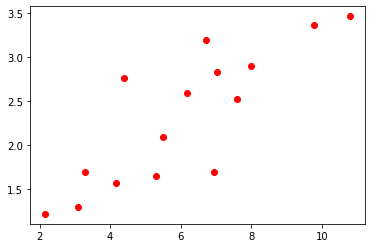

In [32]:
plt.plot(x_train,y_train,'ro',label='Original Data')

In [33]:
X_train=torch.from_numpy(x_train)
Y_train=torch.from_numpy(y_train)


In [34]:
print('requires_grad for X_Train:',X_train.requires_grad)
print('requires_grad for Y_Train:',Y_train.requires_grad)

requires_grad for X_Train: False
requires_grad for Y_Train: False


In [35]:
input_size=1
hidden_size=100
output_size=1
learning_rate=1e-6

In [36]:
w1=torch.rand(input_size,hidden_size,requires_grad=True)
w1.shape

torch.Size([1, 100])

In [37]:
w2=torch.rand(hidden_size,output_size,requires_grad=True)
w2.shape

torch.Size([100, 1])

In [38]:
for iter in range(1,301):
    Y_pred=X_train.mm(w1).clamp(min=0).mm(w2)
    loss=(Y_pred-Y_train).pow(2).sum()
    
    if iter % 50 == 0:
        print(iter,loss.item())
    
    loss.backward()
    
    with torch.no_grad():
        w1-=learning_rate * w1.grad
        w2-=learning_rate * w2.grad
        
        w1.grad.zero_()
        w2.grad.zero_()

50 1842.058349609375
100 26.38669776916504
150 3.9378817081451416
200 3.6367757320404053
250 3.632685422897339
300 3.6326277256011963


In [39]:
print('w1:',w1)
print('w2:',w2)

w1: tensor([[-3.1560e-04,  3.3356e-01,  7.3282e-01, -1.4481e-03, -2.0805e-03,
          3.6649e-01,  9.8294e-01,  2.5269e-01,  9.6444e-01, -4.8585e-03,
         -1.5127e-03,  5.7486e-01,  4.3854e-01,  6.2570e-01,  1.0081e+00,
          4.1972e-01, -4.4108e-04,  5.8948e-01,  1.7107e-01,  8.6102e-03,
         -7.5084e-05,  3.0871e-01,  3.7082e-01,  4.6243e-01, -1.5322e-03,
          3.1152e-01,  5.3254e-03,  1.5210e-01,  6.9640e-01,  1.0313e+00,
          7.3865e-01,  2.0708e-01,  5.6670e-01,  1.8982e-01,  7.9394e-01,
         -5.2914e-03,  2.9338e-01,  4.6493e-01,  4.1945e-03,  9.6221e-02,
          3.5912e-02,  6.7731e-01, -5.9545e-03,  7.2327e-01, -1.9073e-03,
          5.7350e-01,  7.9719e-01,  3.5006e-01,  5.7240e-01,  4.5552e-01,
          9.7670e-01,  6.4170e-01,  3.2896e-01,  7.7002e-01,  8.1564e-01,
          9.1295e-01,  7.2813e-01,  6.8322e-01,  3.5693e-01,  2.6318e-01,
          3.6246e-01, -1.5477e-03,  1.7013e-01,  3.5930e-01,  5.2988e-01,
          6.2015e-01,  6.6083e-01,

In [41]:
x_train_tensor=torch.from_numpy(x_train)
x_train_tensor

tensor([[ 3.3000],
        [ 4.4000],
        [ 5.5000],
        [ 6.7100],
        [ 6.9300],
        [ 4.1680],
        [ 9.7790],
        [ 6.1820],
        [ 7.5900],
        [ 2.1670],
        [ 7.0420],
        [10.7910],
        [ 5.3130],
        [ 7.9970],
        [ 3.1000]])

In [42]:
predicted_in_tensor=x_train_tensor.mm(w1).clamp(min=0).mm(w2)
predicted_in_tensor

tensor([[1.2116],
        [1.6155],
        [2.0193],
        [2.4636],
        [2.5444],
        [1.5303],
        [3.5904],
        [2.2697],
        [2.7867],
        [0.7956],
        [2.5855],
        [3.9619],
        [1.9507],
        [2.9361],
        [1.1382]], grad_fn=<MmBackward0>)

In [43]:
predicted=predicted_in_tensor.detach().numpy()
predicted

array([[1.2116008],
       [1.6154671],
       [2.0193334],
       [2.4635878],
       [2.544361 ],
       [1.5302882],
       [3.590376 ],
       [2.2697315],
       [2.7866812],
       [0.7956178],
       [2.5854816],
       [3.961936 ],
       [1.9506764],
       [2.9361143],
       [1.1381702]], dtype=float32)

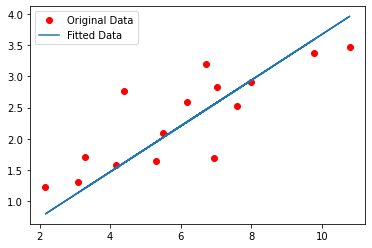

In [45]:
plt.plot(x_train,y_train,'ro',label='Original Data')

plt.plot(x_train,predicted,label='Fitted Data')

plt.legend()
plt.show()
